In [1]:
from sklearn.externals import joblib
import keras
from keras import models
from keras import layers
import model_evaluation_utils as meu
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
train_features = joblib.load('train_tl_features.pkl')
train_labels = joblib.load('train_labels.pkl')
validation_features = joblib.load('validate_tl_features.pkl')
validation_labels = joblib.load('validate_labels.pkl')
test_features = joblib.load('test_tl_features.pkl')
test_labels = joblib.load('test_labels.pkl')

train_features.shape, validation_features.shape, test_features.shape

((18300, 2048), (6100, 2048), (6100, 2048))

In [3]:
train_labels.shape, validation_labels.shape, test_labels.shape

((18300,), (6100,), (6100,))

In [4]:
from keras.utils import to_categorical

train_labels_ohe = to_categorical(train_labels)
validation_labels_ohe = to_categorical(validation_labels)
test_labels_ohe = to_categorical(test_labels)

In [5]:
train_labels_ohe.shape, validation_labels_ohe.shape, test_labels_ohe.shape

((18300, 10), (6100, 10), (6100, 10))

In [6]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(train_features.shape[1],)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_labels_ohe.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
__________

In [7]:
history = model.fit(train_features,
                    train_labels_ohe,
                    epochs=50,
                    batch_size=128,
                    validation_data=(validation_features, validation_labels_ohe), 
                    shuffle=True,
                    verbose=1)

Train on 18300 samples, validate on 6100 samples
Epoch 1/50
18300/18300 [==============================] - 2s - loss: 2.7953 - acc: 0.3959 - val_loss: 1.0665 - val_acc: 0.6675
Epoch 2/50
18300/18300 [==============================] - 1s - loss: 1.1606 - acc: 0.6211 - val_loss: 0.8179 - val_acc: 0.7444
Epoch 3/50
18300/18300 [==============================] - 1s - loss: 0.9639 - acc: 0.6894 - val_loss: 0.6886 - val_acc: 0.7915
Epoch 4/50
18300/18300 [==============================] - 1s - loss: 0.8433 - acc: 0.7295 - val_loss: 0.6637 - val_acc: 0.7908
Epoch 5/50
18300/18300 [==============================] - 1s - loss: 0.7705 - acc: 0.7569 - val_loss: 0.5964 - val_acc: 0.8198
Epoch 6/50
18300/18300 [==============================] - 1s - loss: 0.7160 - acc: 0.7691 - val_loss: 0.5718 - val_acc: 0.8308
Epoch 7/50
18300/18300 [==============================] - 1s - loss: 0.6636 - acc: 0.7867 - val_loss: 0.5309 - val_acc: 0.8321
Epoch 8/50
18300/18300 [==============================] - 1s -

In [10]:
predictions = model.predict_classes(test_features)

5824/6100 [===========================>..] - ETA: 0s

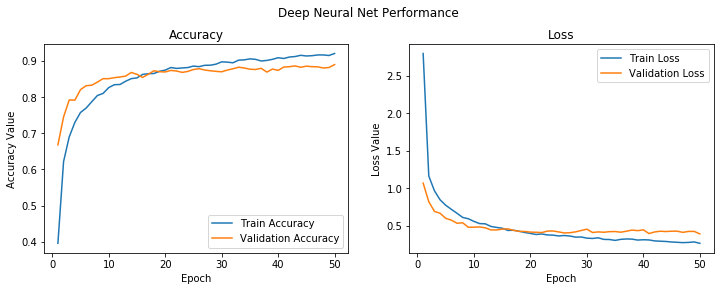

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.2)

epochs = list(range(1,51))
ax1.plot(epochs, history.history['acc'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_acc'], label='Validation Accuracy')
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [13]:
class_map = {'0' : 'air_conditioner', '1' : 'car_horn', '2' : 'children_playing', '3' : 'dog_bark', '4' : 'drilling', 
             '5' : 'engine_idling', '6' : 'gun_shot', '7' : 'jackhammer', '8' : 'siren', '9' : 'street_music'}

test_labels_categories = [class_map[str(label)] for label in test_labels]
prediction_labels_categories = [class_map[str(label)] for label in predictions]
category_names = list(class_map.values())

In [14]:
meu.get_metrics(true_labels=test_labels_categories, 
                predicted_labels=prediction_labels_categories)

Accuracy: 0.8869
Precision: 0.8864
Recall: 0.8869
F1 Score: 0.8861


In [15]:
meu.display_classification_report(true_labels=test_labels_categories, 
                                  predicted_labels=prediction_labels_categories, 
                                  classes=category_names)

                  precision    recall  f1-score   support

        car_horn       0.87      0.73      0.79       188
           siren       0.95      0.94      0.94       750
        drilling       0.88      0.93      0.90       697
        gun_shot       0.94      0.94      0.94        71
children_playing       0.83      0.79      0.81       750
 air_conditioner       0.89      0.94      0.92       813
      jackhammer       0.92      0.93      0.92       735
   engine_idling       0.94      0.95      0.95       745
        dog_bark       0.87      0.83      0.85       543
    street_music       0.81      0.81      0.81       808

     avg / total       0.89      0.89      0.89      6100



In [16]:
meu.display_confusion_matrix_pretty(true_labels=test_labels_categories, 
                                    predicted_labels=prediction_labels_categories, 
                                    classes=category_names)

Predicted:                                           \
                           car_horn siren drilling gun_shot children_playing   
Actual: car_horn                137     4       15        0                3   
        siren                     1   705        5        0                7   
        drilling                  1     2      650        0                1   
        gun_shot                  0     0        1       67                0   
        children_playing          2    11       13        1              592   
        air_conditioner           2     0        6        1                8   
        jackhammer                0     0       28        0                0   
        engine_idling             1     0        3        0                4   
        dog_bark                  1     9        8        2               37   
        street_music             12    15       12        0               64   

                                                                            \
                         air_conditioner jackhammer engine_idling dog_bark   
Actual: car_horn                       3          4             1        2   
        siren                         18          1             2        6   
        drilling                       4         29             2        4   
        gun_shot                       0          0             1        2   
        children_playing              14          2             7       31   
        air_conditioner              768          7            10        2   
        jackhammer                    14        680            11        0   
        engine_idling                 10          4           707        8   
        dog_bark                      10          0             1      448   
        street_music                  18         10             7       14   

                                       
                         street_music  
Actual: car_horn                   19  
        siren                       5  
        drilling                    4  
        gun_shot                    0  
        children_playing           77  
        air_conditioner             9  
        jackhammer                  2  
        engine_idling               8  
        dog_bark                   27  
        street_music              656

In [17]:
model.save('sound_classification_model.h5') 